In [ ]:
'''
Questions for Shmuel:

-is "Day" categorical or continuous variable ? categorical

-'deposit_nm," and "contact" , failing to reject the null hypothesis in chi-square test.

-should i use different techniques for continous and categorical vairables :

http://benalexkeen.com/feature-scaling-with-scikit-learn/


-checking for Co-linearity among the predictor variables; should I do it here.


-Standardization of the variables , mean = 0  and std.deviation = 1



-Dimensionality reduction

-t-test , what does it really tell me ?

-should I do statistical tests after I impute a perticular variable or before ?

'''

1> impute for continuos variable to handle outliers

2> impute for categorical variable to handle "unknown"

3> getdummies on categorical variables

4> train test split

5> cross val 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

##   Input variables:
##### client Information:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default status: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: amount of balance in the account 

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### Campaign Related Attributes:
9 - last contact type : contact communication type (categorical: 'cellular','telephone') 

10 - last contact month of year : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - last contact day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - last contact duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a 
realistic predictive model.

##### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
(numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
  

##### Output variable (desired target):
deposit - has the client subscribed a term deposit? (binary: 'yes','no')




In [1]:
"""
    - #X,Y label on histogram
    - add a title for each chart
    - weather there is a relationship between the feature and the dependent variable 
    - logistic regression , try to predict the logistics regression with the job 
   
   - Histogram for Continuous and Quantitive variables like - balance,duration,age
   
   - Box plot for Continuous and Quantitive variables like - balance,duration,age
   
   - Bar Chart or Count Plot for Categorical variables such as 
        job,marital,education,default,housing,loan,campaign,deposit,day 
   
   - Heatmap correlation
"""

'\n    - #X,Y label on histogram\n    - add a title for each chart\n    - weather there is a relationship between the feature and the dependent variable \n    - logistic regression , try to predict the logistics regression with the job \n   \n   - Histogram for Continuous and Quantitive variables like - balance,duration,age\n   \n   - Box plot for Continuous and Quantitive variables like - balance,duration,age\n   \n   - Bar Chart or Count Plot for Categorical variables such as \n        job,marital,education,default,housing,loan,campaign,deposit,day \n   \n   - Heatmap correlation\n'

In [5]:
bankcampaigns = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_1/bank.csv')



#removing the duration column based on the comment above
#bankcampaigns = bankcampaigns.drop('duration',1,inplace=True)

In [5]:
bankcampaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
age           11162 non-null int64
job           11162 non-null object
marital       11162 non-null object
education     11162 non-null object
default       11162 non-null object
balance       11162 non-null int64
housing       11162 non-null object
loan          11162 non-null object
contact       11162 non-null object
day           11162 non-null int64
month         11162 non-null object
duration      11162 non-null int64
campaign      11162 non-null int64
pdays         11162 non-null int64
previous      11162 non-null int64
poutcome      11162 non-null object
deposit       11162 non-null object
deposit_nm    11162 non-null int64
dtypes: int64(8), object(10)
memory usage: 1.5+ MB


In [3]:
bankcampaigns.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_nm
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1


In [10]:
#Check some middle rows to see if there is any data issues
bankcampaigns.iloc[300:330,:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_nm
300,36,blue-collar,divorced,secondary,no,638,yes,no,unknown,16,jun,1395,2,-1,0,unknown,yes,1
301,48,unemployed,single,tertiary,no,3229,no,no,unknown,16,jun,1089,1,-1,0,unknown,yes,1
302,51,management,single,secondary,no,1610,yes,no,unknown,16,jun,1248,3,-1,0,unknown,yes,1
303,51,blue-collar,married,secondary,no,33,no,yes,unknown,16,jun,721,3,-1,0,unknown,yes,1
304,46,technician,married,secondary,no,536,yes,no,unknown,16,jun,750,2,-1,0,unknown,yes,1
305,37,management,married,tertiary,no,0,no,no,unknown,16,jun,637,6,-1,0,unknown,yes,1
306,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,yes,1
307,47,management,married,secondary,no,2892,no,no,unknown,17,jun,556,1,-1,0,unknown,yes,1
308,40,technician,divorced,tertiary,no,0,no,no,unknown,17,jun,522,1,-1,0,unknown,yes,1
309,38,student,single,tertiary,no,3316,no,no,unknown,17,jun,1345,3,-1,0,unknown,yes,1


In [91]:
bankcampaigns.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


## Analysis of Categorical Variables

### Note: 
### 1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
### 2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.

#### Deposit : Deposit is a categorical variable with values "yes" and "no" , so we convert it to "1" and "0" in order to use it for the ML purposes

In [219]:
bankcampaigns['deposit_nm'] = bankcampaigns['deposit'].map({'yes': 1, 'no': 0})

In [106]:
bankcampaigns.groupby(['deposit_nm'])[['deposit_nm']].count()

,deposit_nm
deposit_nm,
0,5873
1,5289


#### 'Job'

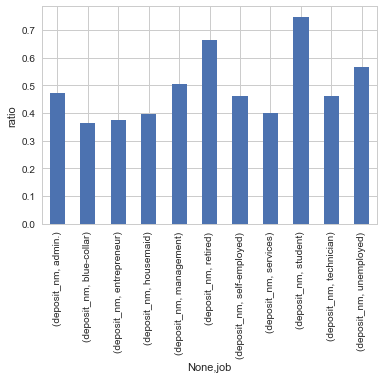

In [61]:
bankcampaigns.groupby([ 'job'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

In [38]:
bankcampaigns.groupby(['job'])[['job']].count()

,job
job,
admin.,1334
blue-collar,1944
entrepreneur,328
housemaid,274
management,2566
retired,778
self-employed,405
services,923
student,360


In [52]:
bankcampaigns.groupby(['job'])[['deposit_nm']].mean()



,deposit_nm
job,
admin.,0.473013
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
management,0.506449
retired,0.663239
self-employed,0.461728
services,0.399783
student,0.747222


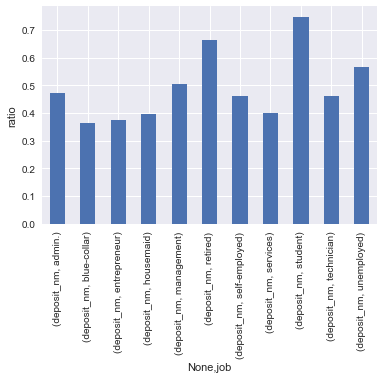

In [53]:
bankcampaigns.groupby([ 'job'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')


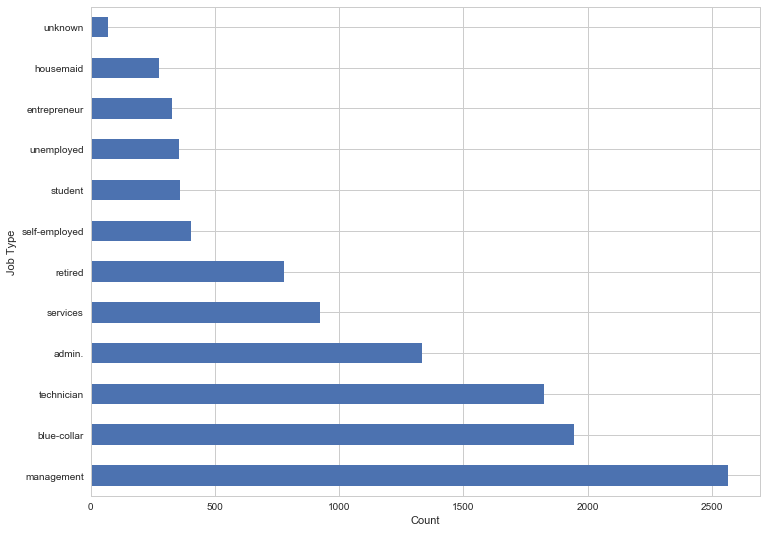

In [220]:
jb = bankcampaigns['job'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Job Type")


#### It seems like the 'unknown' is not greater than 50% of the values , so we will replace it with the most frequently occuring value (i.e mode) from the data set which is "Management"

In [43]:
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

In [46]:
print(bankcampaigns['job'].mode())

0    management
dtype: object


,job
job,
admin.,1334
blue-collar,1944
entrepreneur,328
housemaid,274
management,2636
retired,778
self-employed,405
services,923
student,360


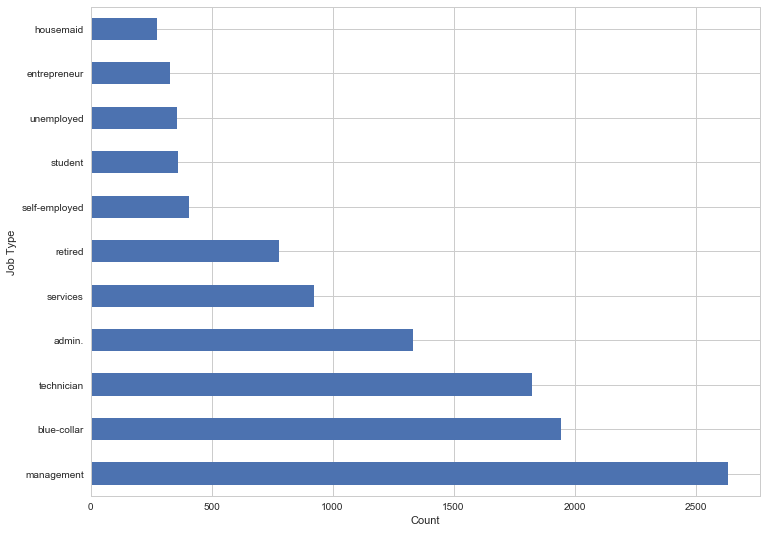

In [221]:


bankcampaigns_new = impute_unknowns(df=bankcampaigns, column='job')

jb = bankcampaigns_new['job'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Job Type")


bankcampaigns_new.groupby(['job'])[['job']].count()

#### As we can see above there are no more 'unknown' and we replace it with 'management' indicated by the higher count of /management' jobs

#### 'Marital'

In [222]:
pd.DataFrame(bankcampaigns.groupby( ['marital'])['deposit_nm'].describe().loc[:,['mean','std']])



deposit_nm
marital                  
divorced mean    0.481052
         std     0.499834
married  mean    0.433790
         std     0.495636
single   mean    0.543491
         std     0.498176

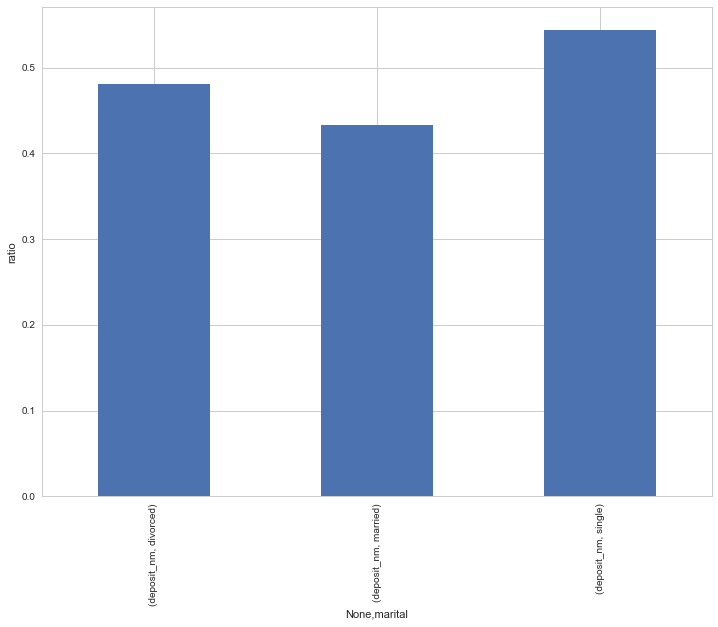

In [223]:
bankcampaigns.groupby(['marital'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

In [224]:
bankcampaigns.groupby(['marital'])[['marital']].count()

,marital
marital,
divorced,1293
married,6351
single,3518


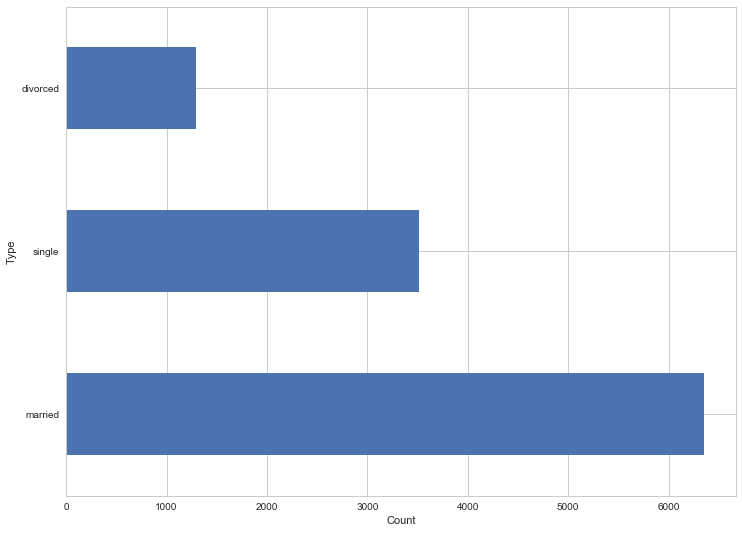

In [111]:
jb = bankcampaigns_new['marital'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Type")


#### 'Housing'

In [ ]:
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['housing']))

In [225]:
bankcampaigns.groupby(['housing'])[['housing']].count()

,housing
housing,
no,5881
yes,5281


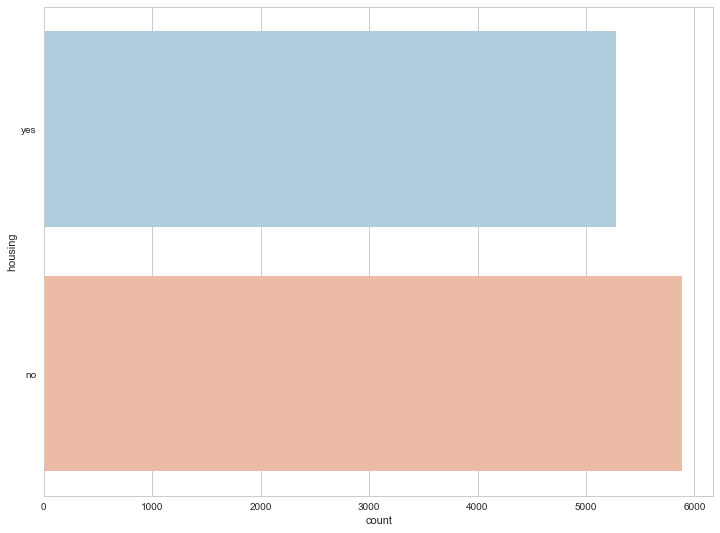

In [226]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['housing'],data=bankcampaigns,palette='RdBu_r')

#### 'Education'

In [227]:
pd.DataFrame(bankcampaigns.groupby( ['education'])['deposit_nm'].describe().loc[:,['mean','std']])

deposit_nm
education                 
primary   mean    0.394000
          std     0.488798
secondary mean    0.447407
          std     0.497272
tertiary  mean    0.541068
          std     0.498378
unknown   mean    0.507042
          std     0.500454

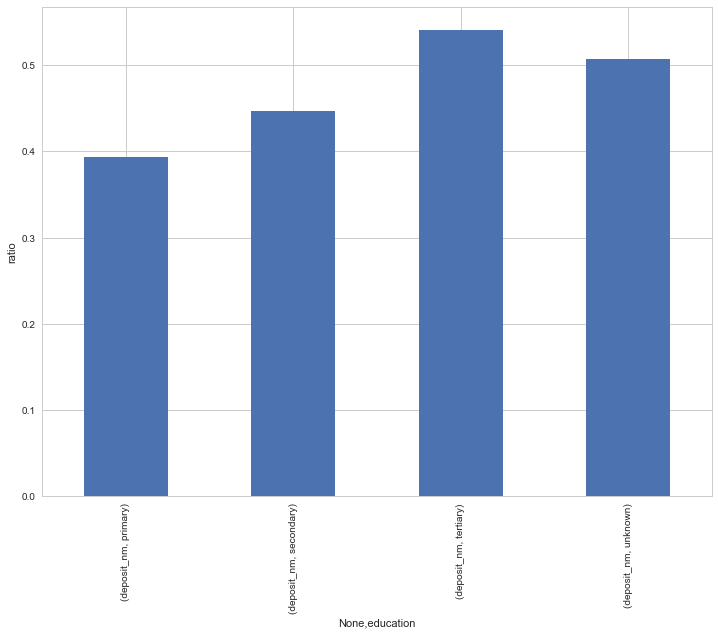

In [228]:
bankcampaigns.groupby(['education'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

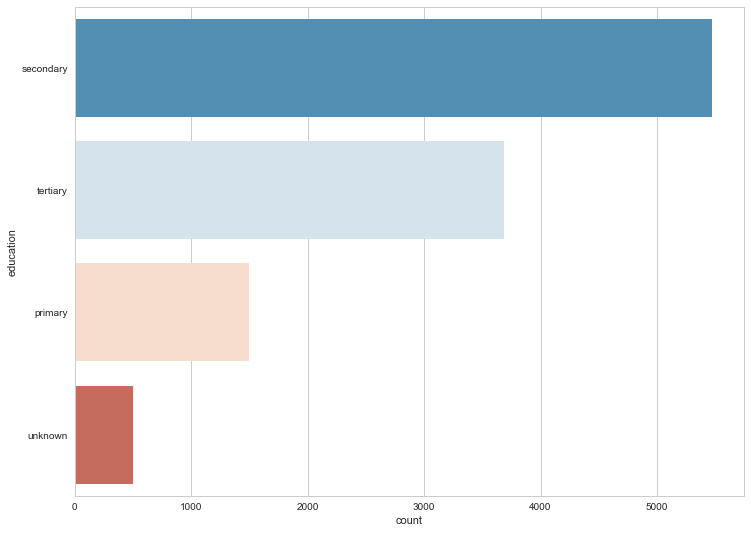

In [229]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['education'],data=bankcampaigns,palette='RdBu_r')

#### We can fix the 'Education' for 'unknown' values 

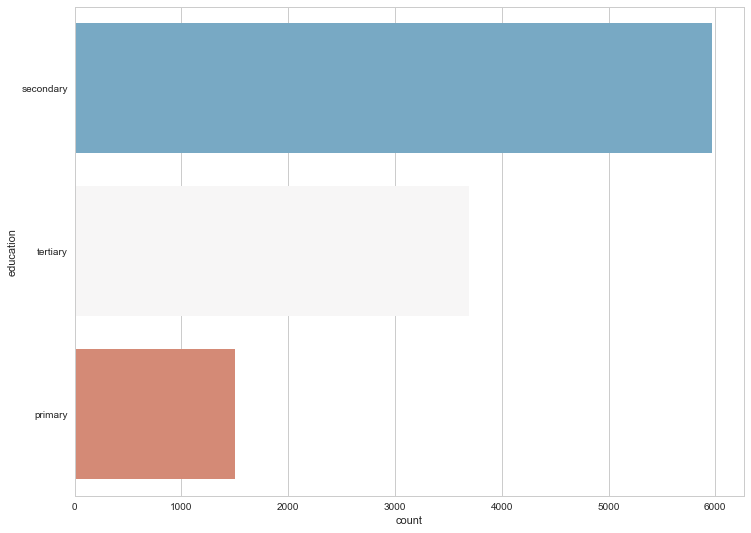

In [230]:
bankcampaigns_new = impute_unknowns(df=bankcampaigns, column='education')

sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['education'],data=bankcampaigns_new,palette='RdBu_r')

#### 'Default Status'

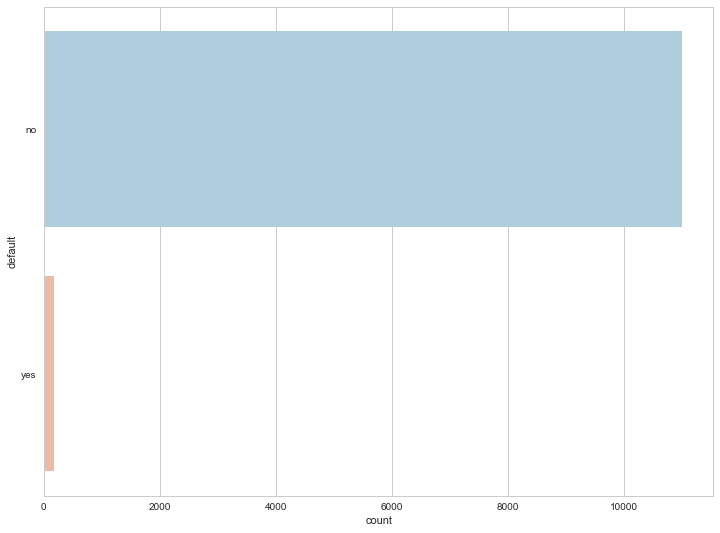

In [231]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['default'],data=bankcampaigns,palette='RdBu_r')

#### 'Loan'

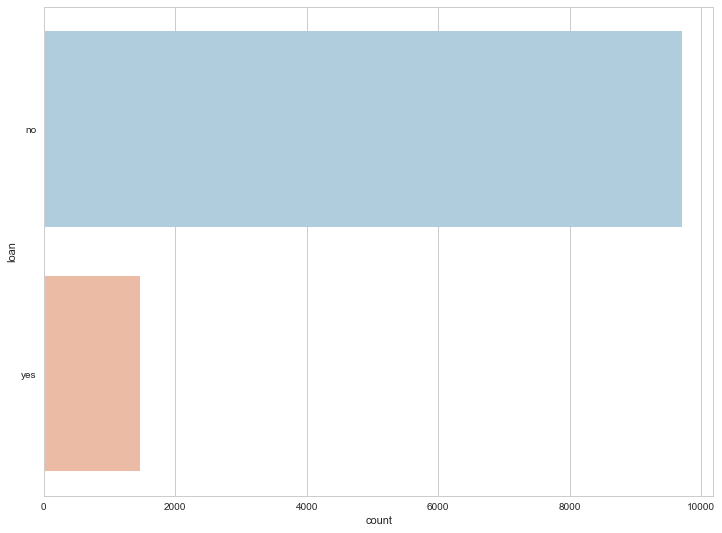

In [232]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['loan'],data=bankcampaigns,palette='RdBu_r')

#### 'Last Contact Type'

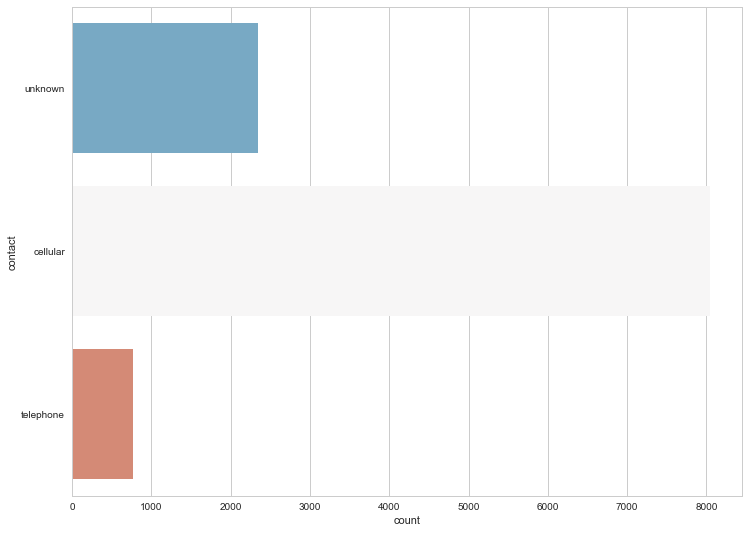

In [233]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['contact'],data=bankcampaigns,palette='RdBu_r')

#### As shown above we need to impute the "Contact" attribute to remove Unknown values

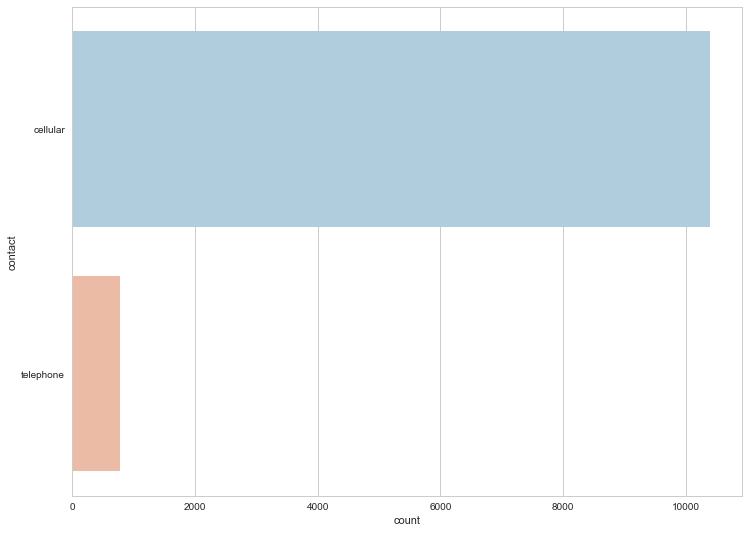

In [234]:
bankcampaigns_new = impute_unknowns(df=bankcampaigns, column='contact')

sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['contact'],data=bankcampaigns_new,palette='RdBu_r')

#### 'Last Contact Month'

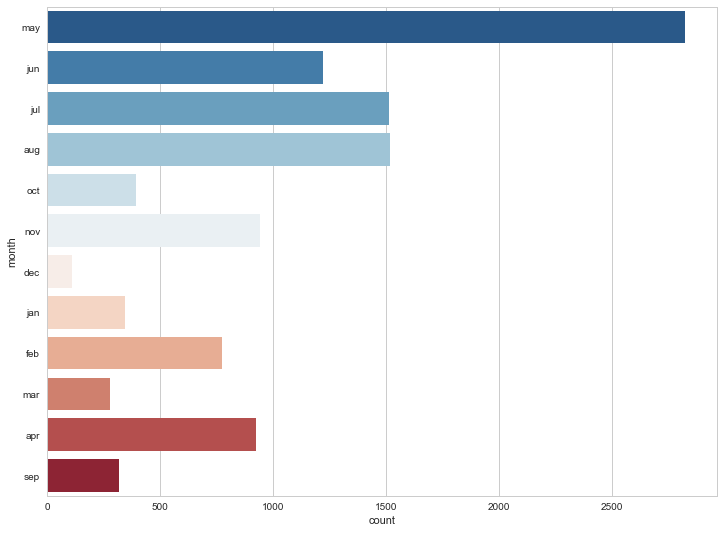

In [235]:

sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['month'],data=bankcampaigns,palette='RdBu_r')

#### 'Last Contact Day Of Week'

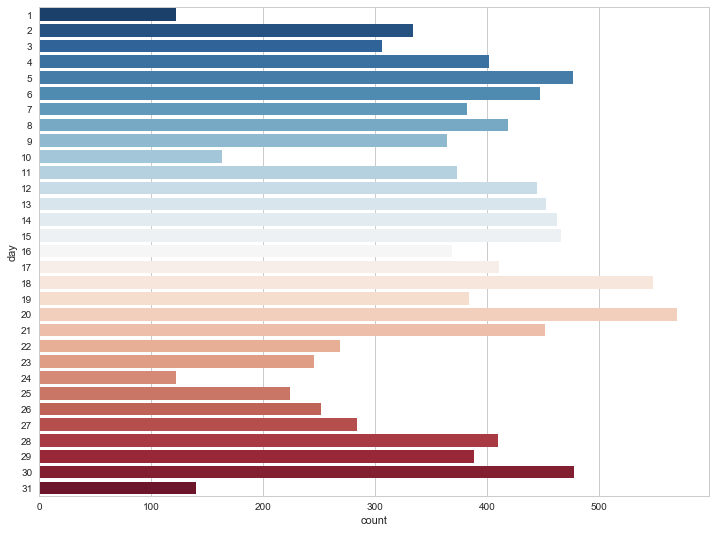

In [236]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['day'],data=bankcampaigns,palette='RdBu_r')

#### 'POutcome'

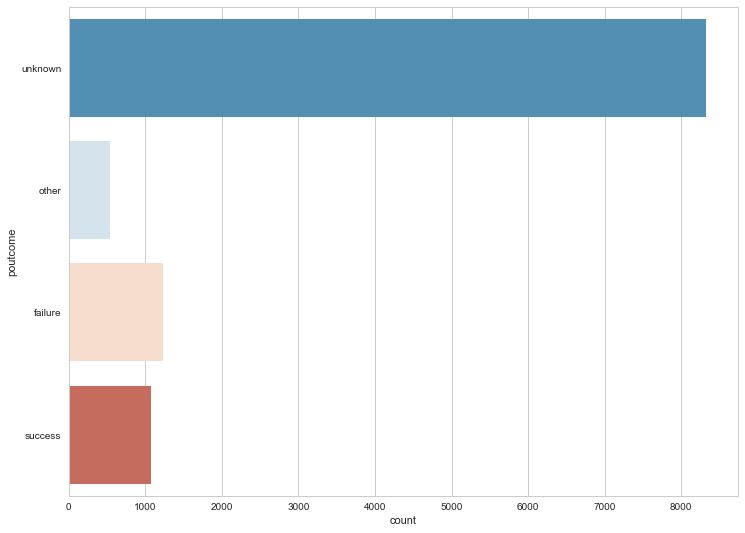

In [237]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['poutcome'],data=bankcampaigns,palette='RdBu_r')

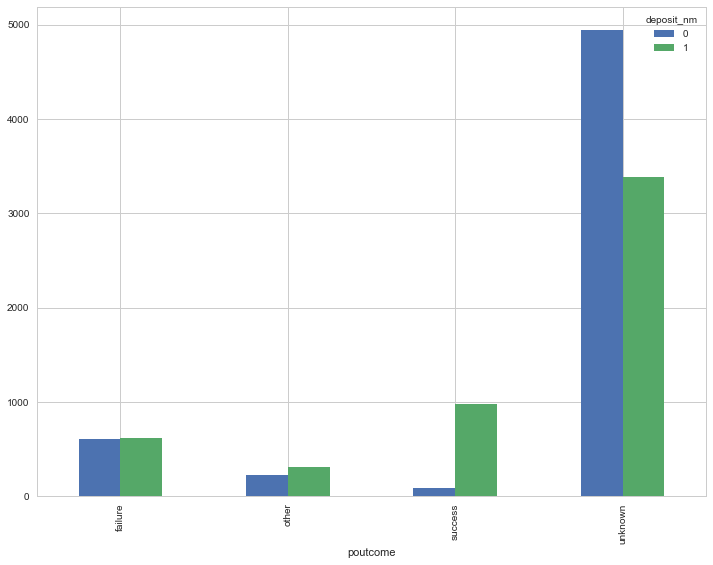

In [239]:
temp8 = pd.crosstab(bankcampaigns['poutcome'], bankcampaigns['deposit_nm'])
temp8.plot(kind='bar')

In [240]:
len(bankcampaigns)

11162

#### Lets check if the poutcome has more than 50% missing values (aka 'Unknown') or not

In [241]:
print((bankcampaigns.groupby(['poutcome']).size() *100)/len(bankcampaigns)) 

poutcome
failure    11.001613
other       4.810966
success     9.595055
unknown    74.592367
dtype: float64


#### poutcome has 74% missing values (aka 'Unknown') so we can drop this variable

In [242]:
del bankcampaigns_new['poutcome']

In [243]:
bankcampaigns_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age           11162 non-null int64
job           11162 non-null object
marital       11162 non-null object
education     11162 non-null object
default       11162 non-null object
balance       11162 non-null int64
housing       11162 non-null object
loan          11162 non-null object
contact       11162 non-null object
day           11162 non-null int64
month         11162 non-null object
duration      11162 non-null int64
campaign      11162 non-null int64
pdays         11162 non-null int64
previous      11162 non-null int64
deposit       11162 non-null object
deposit_nm    11162 non-null int64
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


## Analysis of Continuous Variables

##### Note: Here are the steps we perform to make sure we handle the our of the range values.
###### 1>We first conduct the analysis of each Continuous Variable with Graphical EDA
###### 2>Outliers can be defined as values out of range [(Q1-1.5* IQR) , (Q3+1.5*IQR)] 
###### 3> We check any values smaller then [(Q1-1.5* IQR) or larger then (Q3+1.5*IQR) 
###### 4> After identifying these values that fall outside our range,we impute them by "mean" of respective variable. 
###### 5> Here Q1-First Quartile(25%), Q2-Second Quartile(75%), IQR-Inter Quartile Range

#in general remove outliers ,run the model with outliers and without and check , best not to replace outlier values ,either remove it or consider it and use it and compare the model performance

### 'Age'

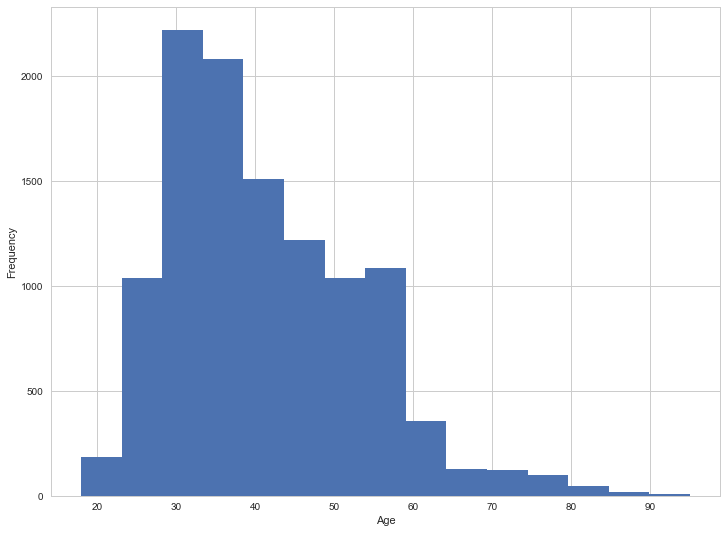

In [196]:
ax = bankcampaigns['age'].plot(kind='hist', bins=15)
ax.set_xlabel("Age")


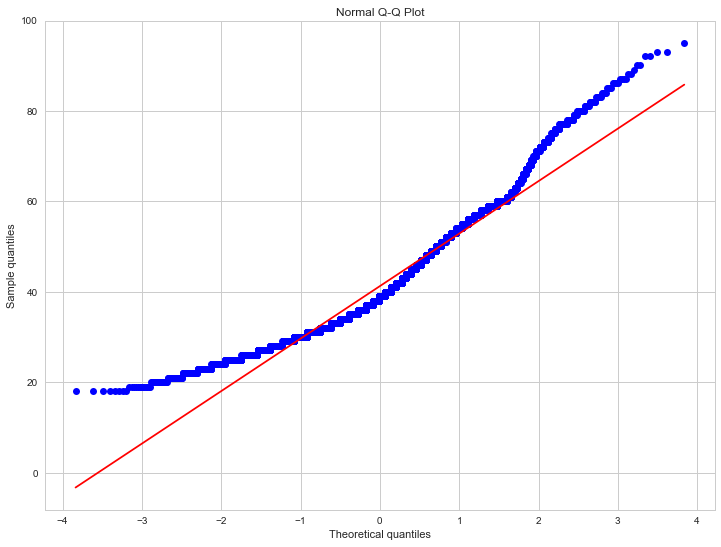

In [197]:
stats.probplot(bankcampaigns_new['age'], dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

In [198]:
#bankcampaigns.boxplot(column=['age'],by = ['deposit_nm']).set_yscale('log')
pd.DataFrame(bankcampaigns.groupby( ['deposit_nm'])['age'].describe().loc[:,['mean','std']])

#avg age between two groups is very small but still significant 

age
deposit_nm                
0          mean  40.837391
           std   10.264815
1          mean  41.670070
           std   13.497781

In [199]:
q75, q25 = np.percentile(bankcampaigns['age'], [75 ,25])


print('Age q75 = ',q75)
print('Age q25 = ',q25)

Age q75 =  49.0
Age q25 =  32.0


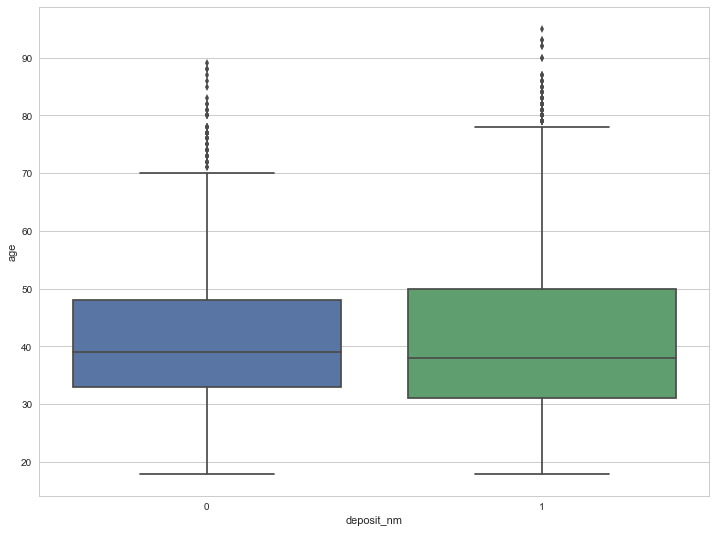

In [200]:
sns.boxplot(x='deposit_nm', y='age', data=bankcampaigns)

### 'Balance'

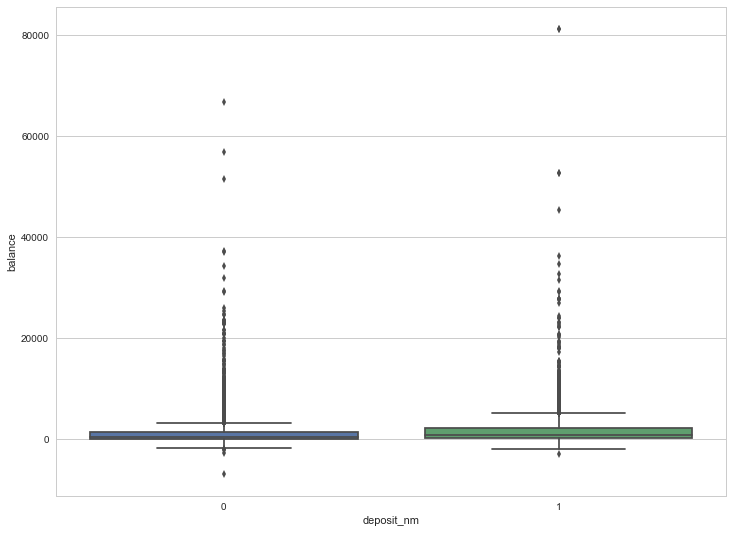

In [201]:
sns.boxplot(x='deposit_nm', y='balance', data=bankcampaigns)

#### As shown above we can see that there are lot of outliers in the "Balance" data and so it would be a good practice to impute the outliers to make sure they dont affect the modle performance

In [20]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

iqr =  1586.0


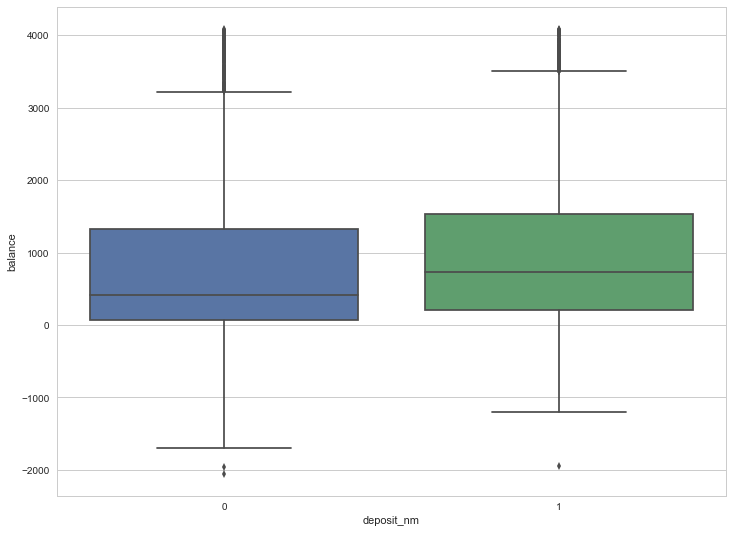

In [202]:

q75, q25 = np.percentile(bankcampaigns['balance'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

bankcampaigns_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns_new, column='balance' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='balance', data=bankcampaigns_new)

#### As shown above with the impute operation the outliers have mostly seem to disappear and the "Balance" data looks well distributed within the min and max values
 

### 'Day'

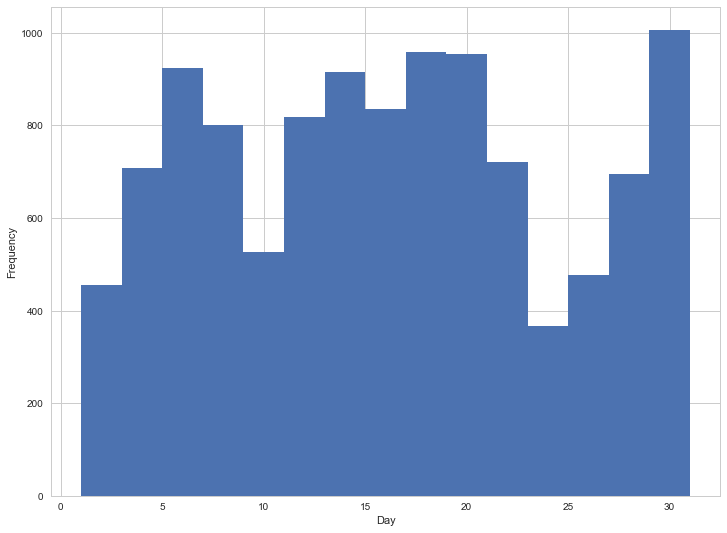

In [203]:
ax = bankcampaigns['day'].plot(kind='hist', bins=15)
ax.set_xlabel("Day")


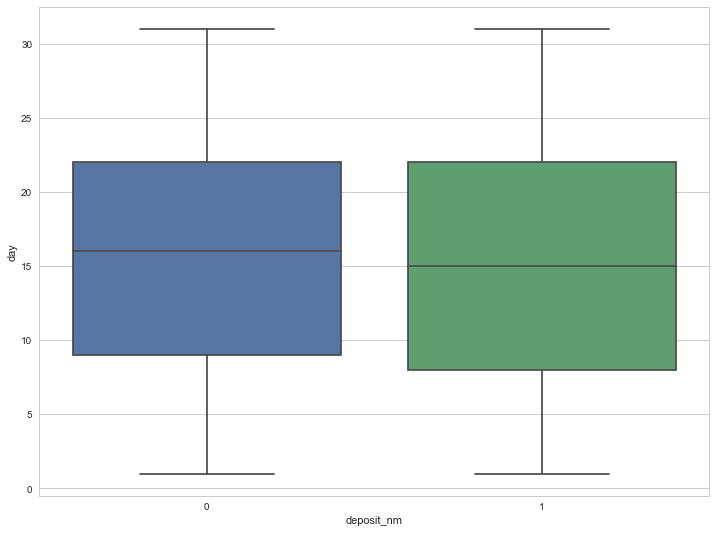

In [204]:
sns.boxplot(x='deposit_nm', y='day', data=bankcampaigns)

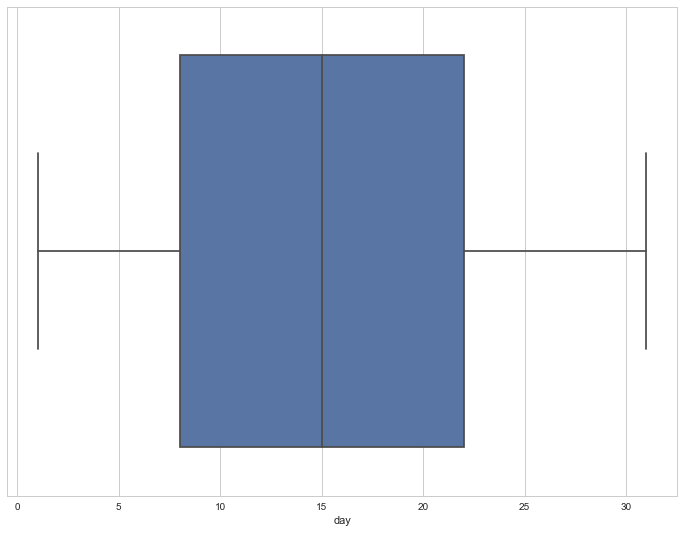

In [205]:
ax = sns.boxplot(x=bankcampaigns["day"])

In [206]:
q75, q25 = np.percentile(bankcampaigns['day'], [75 ,25])

print('q75 = ',q75)
print('q25 = ',q25)

q75 =  22.0
q25 =  8.0


### 'Duration'

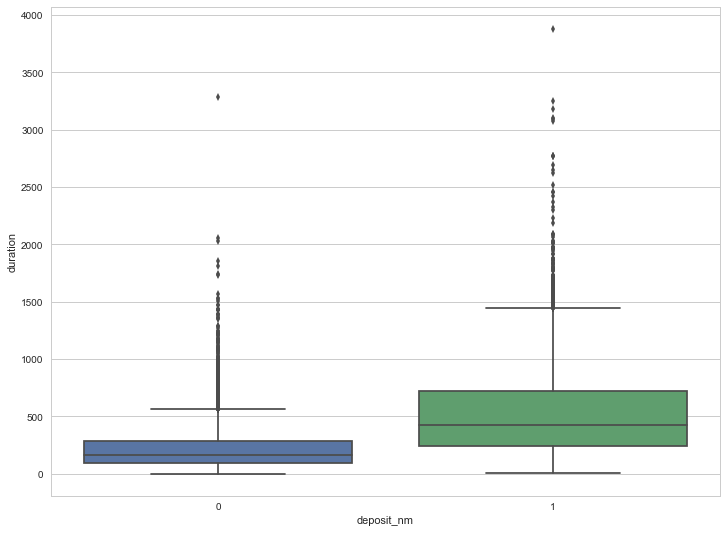

In [207]:
sns.boxplot(x='deposit_nm', y='duration', data=bankcampaigns)

#### As shown above the Duration has quite a lot of outliers and so it would be best to use the outlier impute function

iqr =  358.0


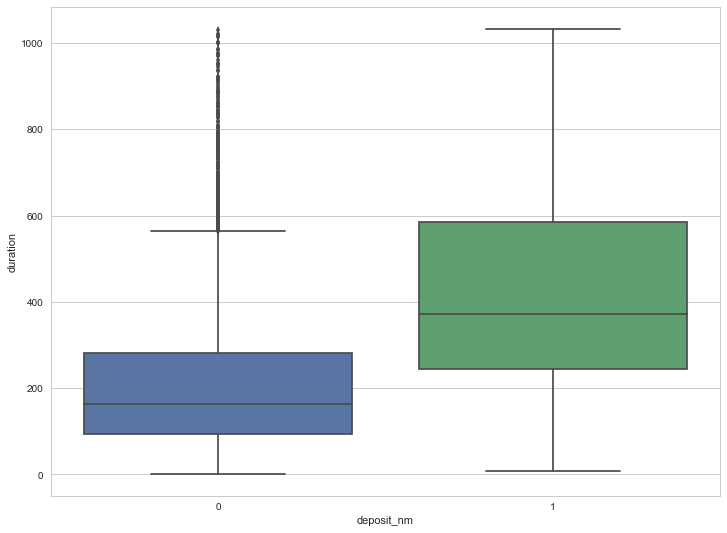

In [208]:
q75, q25 = np.percentile(bankcampaigns['duration'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='duration' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='duration', data=bankcampaigns_new)

#### As shown above with the impute operation the outliers have mostly seem to disappear and the "Duration" data looks well distributed within the min and max values
 

### 'Campaign'

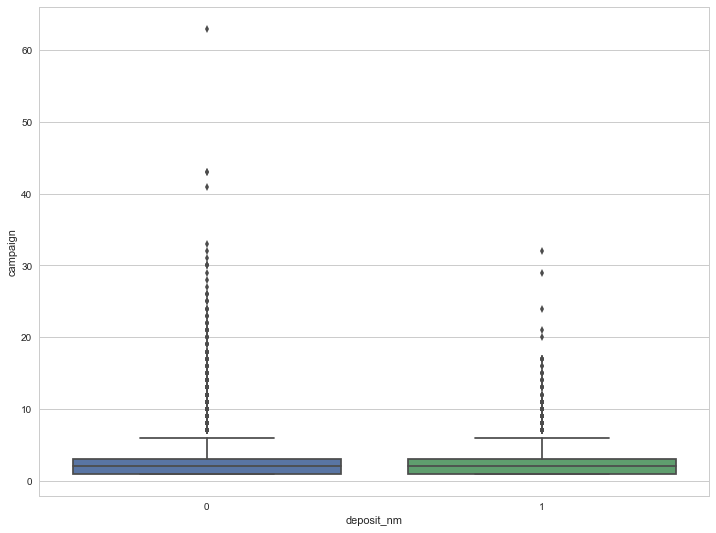

In [209]:
sns.boxplot(x='deposit_nm', y='campaign', data=bankcampaigns)

As shown above the Campaign has quite a lot of outliers and so it would be best to use the outlier impute function

iqr =  2.0


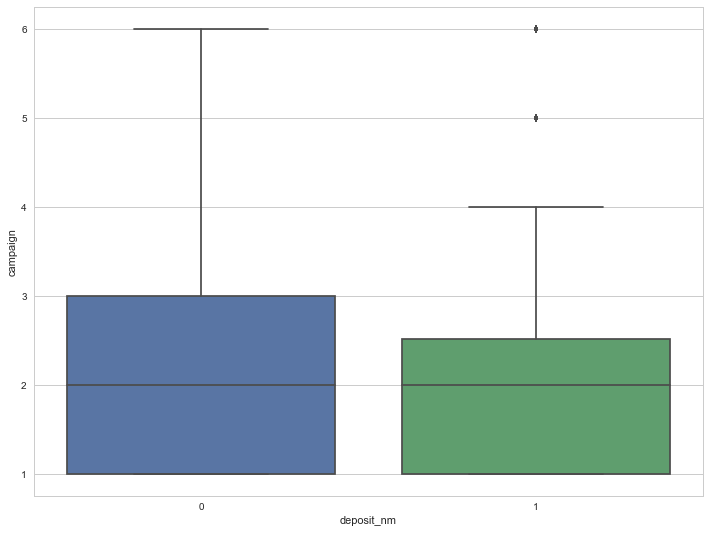

In [210]:
q75, q25 = np.percentile(bankcampaigns['campaign'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='campaign' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='campaign', data=bankcampaigns_new)

### 'pdays'

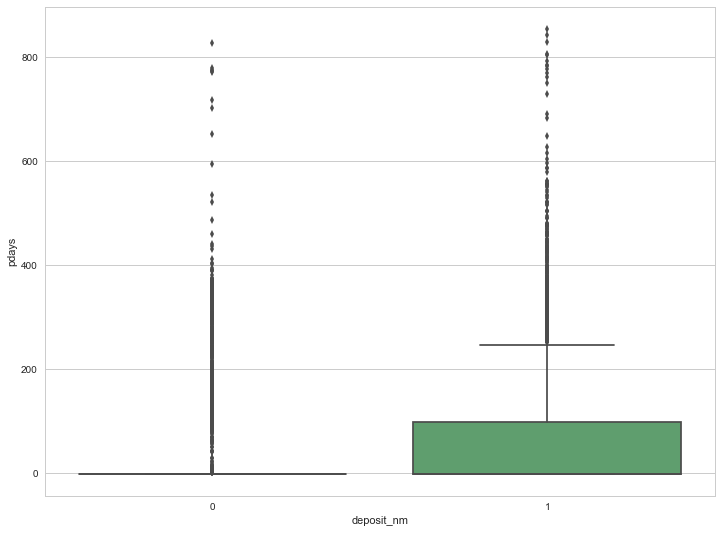

In [211]:
sns.boxplot(x='deposit_nm', y='pdays', data=bankcampaigns)

As shown above the pdays has quite a lot of outliers and so it would be best to use the outlier impute function

iqr =  21.75


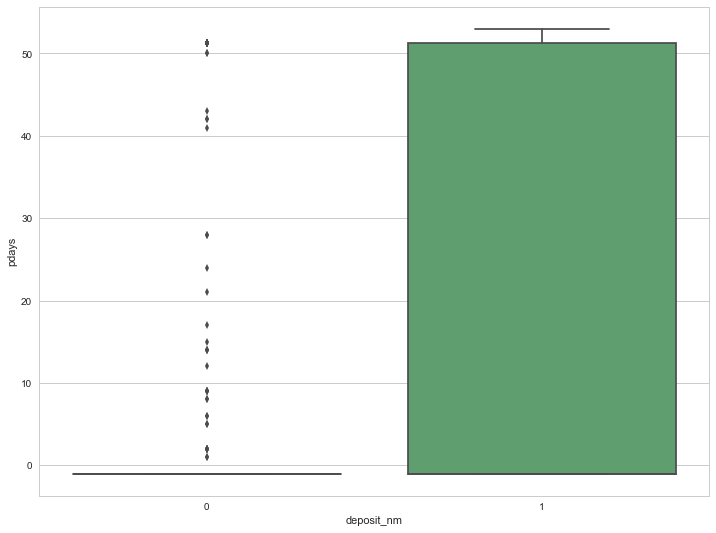

In [212]:
q75, q25 = np.percentile(bankcampaigns['pdays'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='pdays' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='pdays', data=bankcampaigns_new)

### 'Previous'

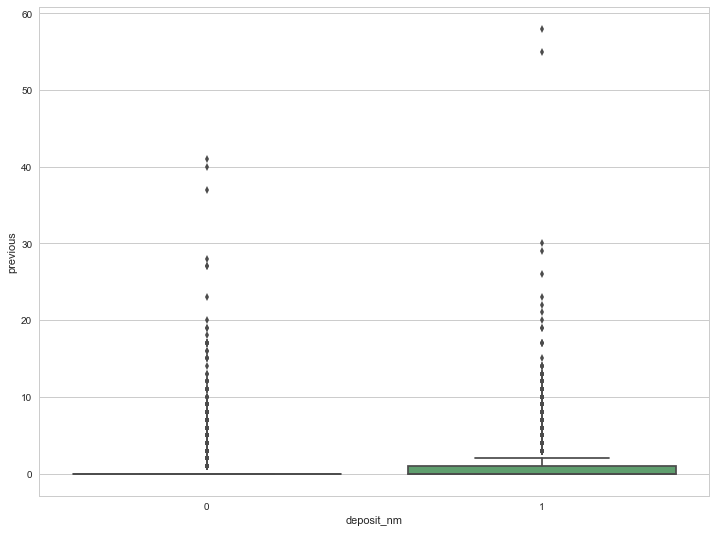

In [213]:
sns.boxplot(x='deposit_nm', y='previous', data=bankcampaigns)

As shown above the previous has quite a lot of outliers and so it would be best to use the outlier impute function

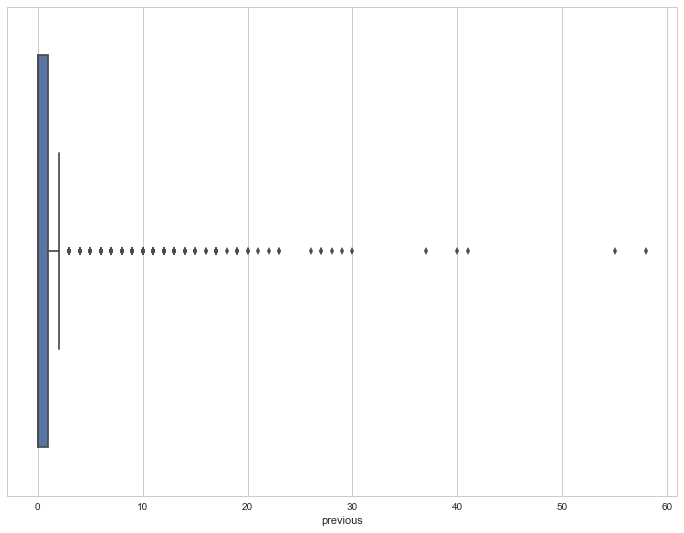

In [214]:
ax = sns.boxplot(x=bankcampaigns["previous"])

iqr =  1.0
q75 =  1.0
q25 =  0.0
min_val =  -1.5
max_val =  2.5


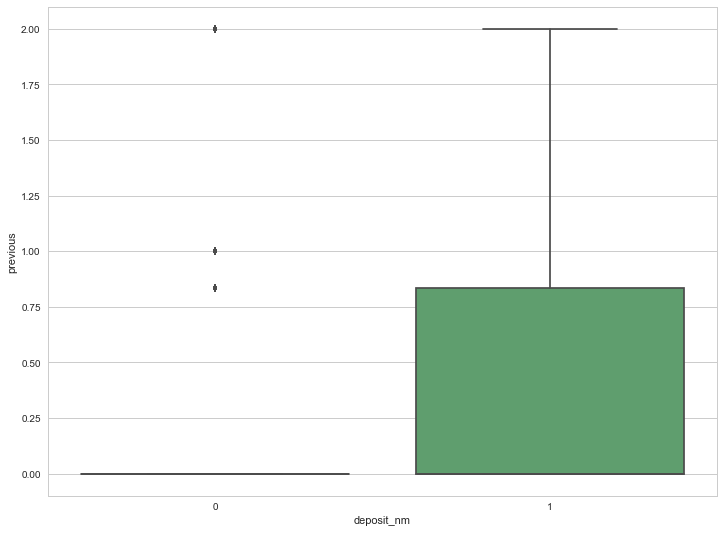

In [215]:
q75, q25 = np.percentile(bankcampaigns['previous'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)


print('q75 = ',q75)
print('q25 = ',q25)

min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

print('min_val = ',min_val)
print('max_val = ',max_val)


#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='previous' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='previous', data=bankcampaigns_new)

#### Checking the Correlationship between different variables

In [148]:
bankcampaigns_new.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
age,1.000000,0.124418,-0.000762,0.006998,0.003239,0.027832,0.019193,0.034901
balance,0.124418,1.000000,-0.002524,0.033158,-0.025456,0.085205,0.075585,0.140769
day,-0.000762,-0.002524,1.000000,-0.025186,0.088648,-0.082047,-0.074453,-0.056326
duration,0.006998,0.033158,-0.025186,1.000000,-0.025647,-0.000392,-0.005235,0.468053
campaign,0.003239,-0.025456,0.088648,-0.025647,1.000000,-0.106884,-0.109126,-0.103261
pdays,0.027832,0.085205,-0.082047,-0.000392,-0.106884,1.000000,0.897565,0.231655
previous,0.019193,0.075585,-0.074453,-0.005235,-0.109126,0.897565,1.000000,0.204665
deposit_nm,0.034901,0.140769,-0.056326,0.468053,-0.103261,0.231655,0.204665,1.000000


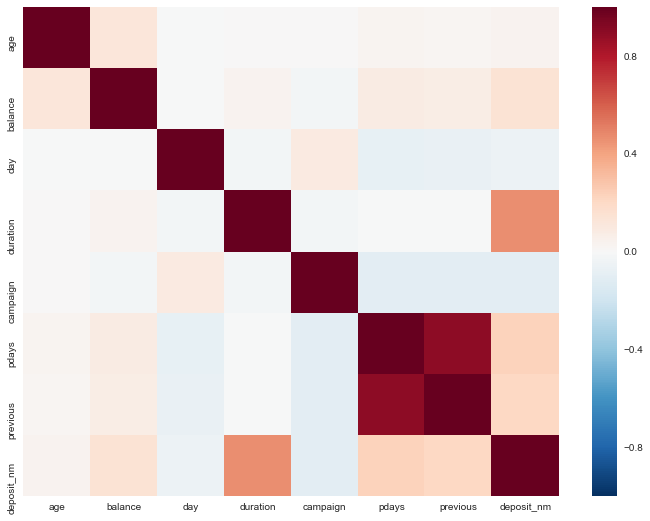

In [149]:
sns.heatmap(bankcampaigns_new.corr())

#### Age is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Age

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Age = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Age > 0


In [273]:
stats.ttest_ind(bankcampaigns[bankcampaigns['deposit_nm']==0]['age'],bankcampaigns[bankcampaigns['deposit_nm']==1]['age'])




Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Age.

#### Balance is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Balance

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Balance = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Balance > 0

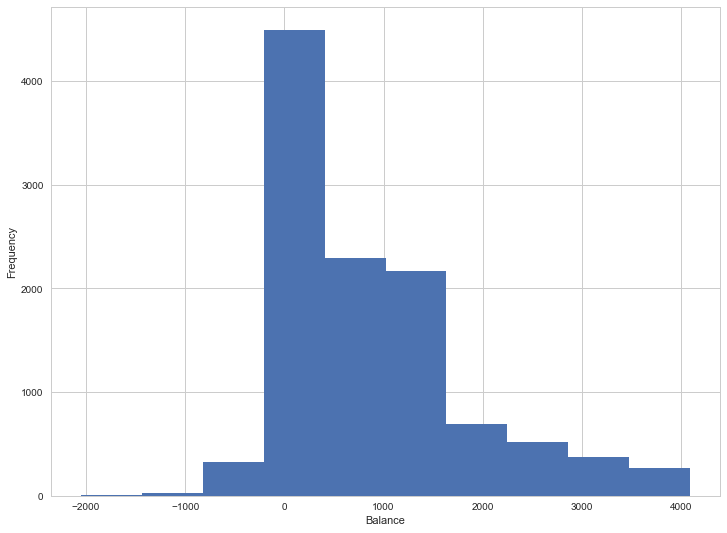

In [151]:
bal = bankcampaigns_new['balance'].plot(kind='hist', bins=10)
bal.set_xlabel("Balance")

In [152]:

#---?? why is the Y axis so much out of range
#try limit the axis
#under each chart add a small discussion


pd.DataFrame(bankcampaigns_new.groupby( ['deposit_nm'])['balance'].describe().loc[:,['mean','std']])

balance
deposit_nm                  
0          mean   747.905046
           std    928.071506
1          mean  1022.054227
           std    999.996656

In [153]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['balance'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['balance'])


Ttest_indResult(statistic=-15.020577790884301, pvalue=1.6752029049122335e-50)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Balance.

#### Duration is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Duration

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Duration = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Duration > 0

count    11162.000000
mean       315.284991
std        230.891992
min          2.000000
25%        138.000000
50%        255.000000
75%        412.000000
max       1033.000000
Name: duration, dtype: float64

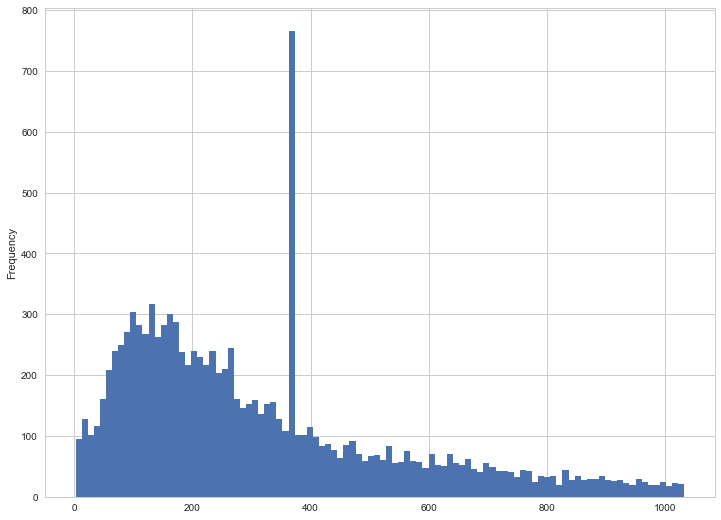

In [154]:
bankcampaigns_new['duration'].plot(kind='hist', bins=100)
bankcampaigns_new['duration'].describe()

In [156]:



pd.DataFrame(bankcampaigns_new.groupby( ['deposit_nm'])['duration'].describe().loc[:,['mean','std']])

duration
deposit_nm                 
0          mean  212.733629
           std   170.661090
1          mean  429.159853
           std   235.643781

In [157]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['duration'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['duration'])


Ttest_indResult(statistic=-55.952865882210517, pvalue=0.0)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Duration.

#### ???? Day is a categorical variable so use Chi-Square Test ?

#### Since Deposit_NM and Job are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.

Ho: There is no relationship between Deposit_NM and Job.

H1: There is relationship between Deposit_NM and Job.

In [158]:
dfjob = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['job'])
dfjob

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
deposit_nm,,,,,,,,,,,
0,703,1236,205,165,1301,262,218,554,91,983,155
1,631,708,123,109,1335,516,187,369,269,840,202


In [159]:


chi2,p,dof,expected = stats.chi2_contingency(dfjob.values)

print('P-Value = ', p)

P-Value =  4.60873483328e-75


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Job

#### Since Deposit_NM and Marital are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.

Ho: There is no relationship between Deposit_NM and Marital.

H1: There is relationship between Deposit_NM and Marital.

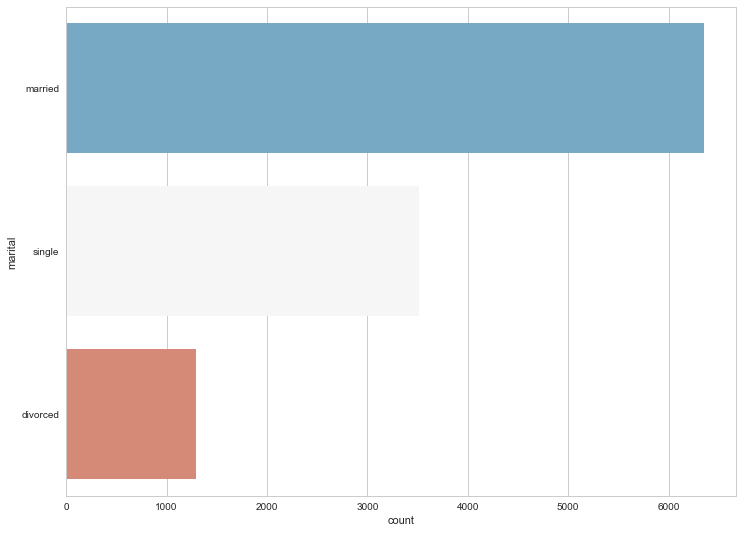

In [160]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['marital'],data=bankcampaigns_new,palette='RdBu_r')

In [161]:
dfmarital = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['marital'])
dfmarital

marital,divorced,married,single
deposit_nm,,,
0,671,3596,1606
1,622,2755,1912


In [162]:
chi2,p,dof,expected = stats.chi2_contingency(dfmarital.values)

print('P-Value = ', p)

P-Value =  1.60057698809e-24


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Marital

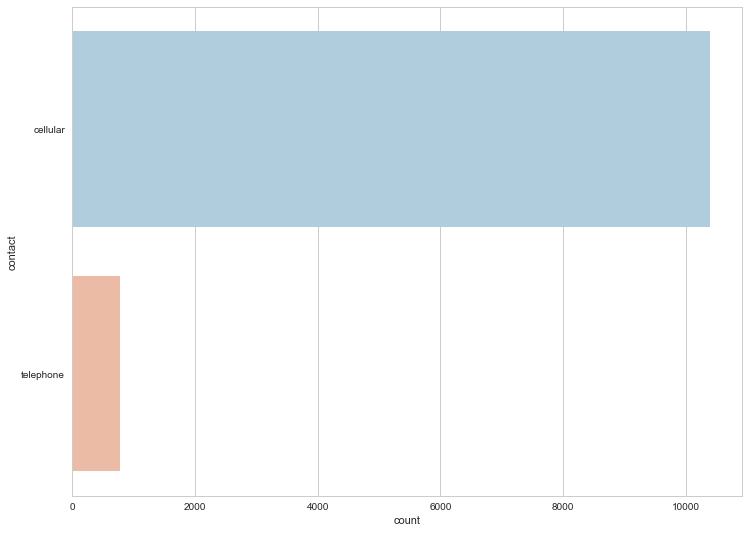

In [163]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['contact'],data=bankcampaigns_new,palette='RdBu_r')

#### Since Deposit_NM and Contact are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.¶

Ho: There is no relationship between Deposit_NM and Contact.

H1: There is relationship between Deposit_NM and Contact.

In [164]:
dfcontact = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['contact'])
dfcontact

contact,cellular,telephone
deposit_nm,,
0,5489,384
1,4899,390


In [165]:
chi2,p,dof,expected = stats.chi2_contingency(dfcontact.values)

print('P-Value = ', p)

P-Value =  0.0896073926119


Since P_Value > 0.05 , we fail to reject the null hypothesis and can say that there is no relationship between Deposit_NM and Contact

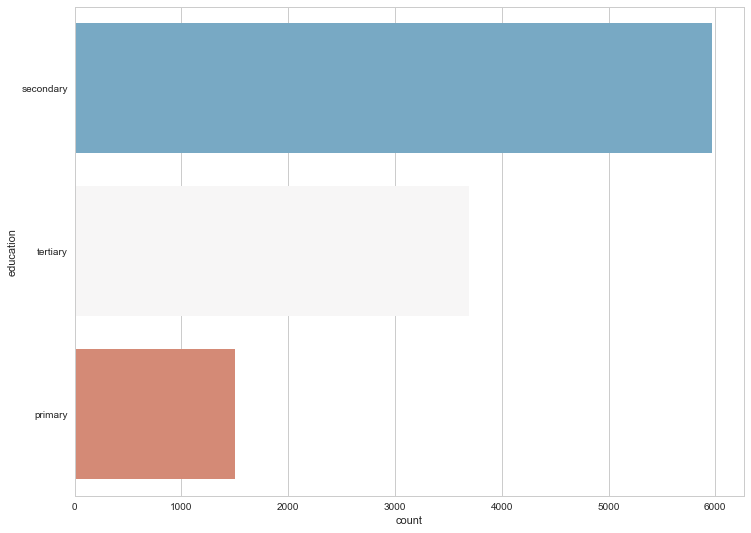

In [166]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['education'],data=bankcampaigns_new,palette='RdBu_r')

#### Since Deposit_NM and Education are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.¶
Ho: There is no relationship between Deposit_NM and Education.

H1: There is relationship between Deposit_NM and Education.

In [167]:
dfedu = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['education'])
dfedu

education,primary,secondary,tertiary
deposit_nm,,,
0,909,3271,1693
1,591,2702,1996


In [168]:
#taking unknown out to perform Chi-square test

#w = bankcampaigns[bankcampaigns.education!='unknown']

#dfedo = pd.crosstab(bankcampaigns['deposit_nm'],w['education'])

chi2,p,dof,expected = stats.chi2_contingency(dfedu.values)

print('P-Value = ', p)

P-Value =  5.65173108273e-26


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Education

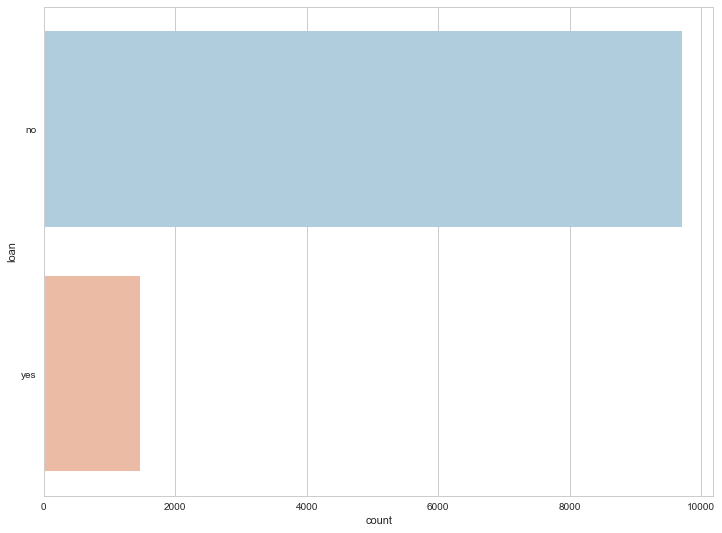

In [169]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['loan'],data=bankcampaigns_new,palette='RdBu_r')

#### Since Deposit_NM and Loan are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.¶
Ho: There is no relationship between Deposit_NM and Loan.

H1: There is relationship between Deposit_NM and Loan.

In [170]:
dfloan = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['loan'])
dfloan

loan,no,yes
deposit_nm,,
0,4897,976
1,4805,484


In [171]:
chi2,p,dof,expected = stats.chi2_contingency(dfloan.values)

print('P-Value = ', p)

P-Value =  2.17128687963e-31


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Loan

Current size: [12.0, 9.0]


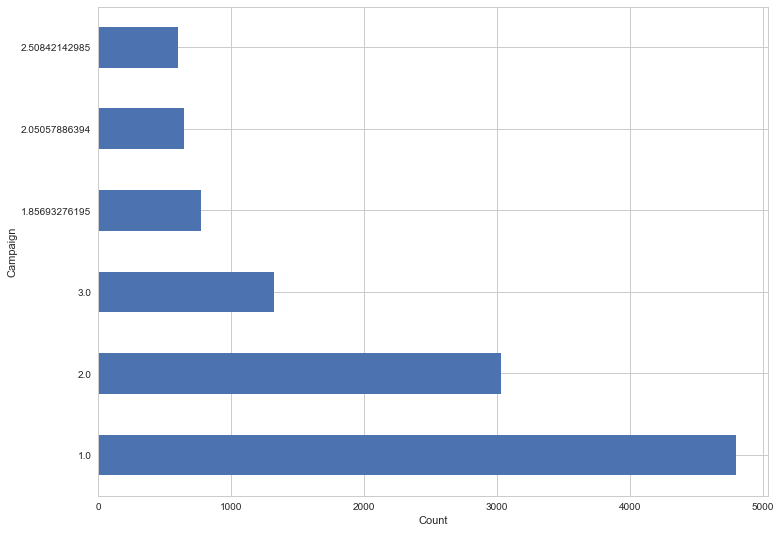

In [188]:
#bankcampaigns['campaign'].plot(kind='hist', bins=10)
#bar plot

camp = bankcampaigns['campaign'].value_counts().plot(kind='barh')
camp.set_xlabel("Count")
camp.set_ylabel("Campaign")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

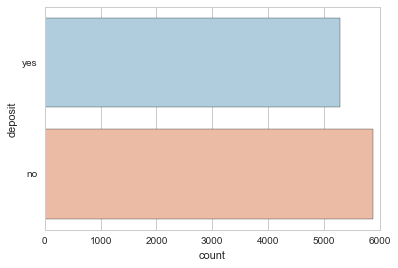

In [77]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['deposit'],data=bankcampaigns,palette='RdBu_r')
#its balanced
#change yes and no to 0 and 1 

In [43]:
#bankcampaigns['deposit_nm','deposit_numeric']
#pd.get_dummies(bankcampaigns['deposit'])
bankcampaigns['deposit_nm'] = bankcampaigns['deposit'].map({'yes': 1, 'no': 0})
bankcampaigns['deposit_nm'].describe()

count    11162.000000
mean         0.473840
std          0.499338
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit_nm, dtype: float64

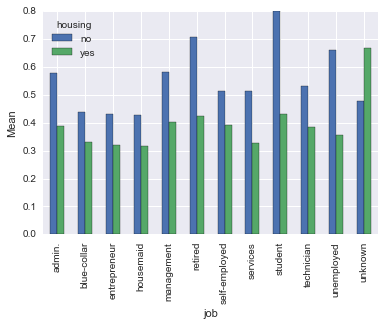

In [27]:

bankcampaigns.groupby(['job','housing'])['deposit_nm'].mean().unstack().plot(kind='bar').set_ylabel('Mean')

In [244]:
list(bankcampaigns_new.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'deposit_nm']

In [250]:


print(bankcampaigns_new.columns[0:15])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')


In [251]:
dataset_Y = bankcampaigns_new['deposit_nm']
dataset_X = bankcampaigns_new[dataset_new.columns[0:15]]

In [253]:
dataset_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [8]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Break into left and right hand side; y and X
#y, X = dmatrices('annual_inc ~' + features, df, return_type='dataframe')
#features = "+".join(bos.columns - ["PRICE"])

#features = bos.columns['CRIM','ZN','NOX','PRATIO','BLACK','RM']

#bos = bankcampaigns[['balance', 'duration','campaign','pdays','previous']]

In [10]:
#y, X = dmatrices('age ~'+ bos,bos, return_type="dataframe")

#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns

#### Note that we use 'drop_first = True' to avoid multi-colinearity

In [274]:
dataset_X_dummy = pd.get_dummies(dataset_X,drop_first=True)
print(dataset_X_dummy.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   59     2343    5      1042         1     -1         0                0   
1   56       45    5      1467         1     -1         0                0   
2   41     1270    5      1389         1     -1         0                0   
3   55     2476    5       579         1     -1         0                0   
4   54      184    5       673         2     -1         0                0   

   job_entrepreneur  job_housemaid    ...      month_dec  month_feb  \
0                 0              0    ...              0          0   
1                 0              0    ...              0          0   
2                 0              0    ...              0          0   
3                 0              0    ...              0          0   
4                 0              0    ...              0          0   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0          0          

In [255]:
#bankcampaigns_new = bankcampaigns.join(pd.get_dummies(bankcampaigns['job']))
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['marital']))
#???????Education has some unknown, how do we take it out so that we can just have primary,secondary,ternary

#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['education']))

#??????Housing has yes,no,unknown and loan also have yes,no,unknown so how do we seperate them while using
#getdummies()
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['housing']))
#??????how do I drop unknown from Contact since its conflicting with other unknown
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['contact']))
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['loan']))
#bankcampaigns_new.drop('job', axis = 1, inplace = True)
#bankcampaigns_new.drop('marital', axis = 1, inplace = True)
#bankcampaigns_new.drop('housing', axis = 1, inplace = True)

#list(bankcampaigns_new.columns.values)





In [25]:
bankcampaigns_new['intercept'] = 1

#bankcampaigns = bankcampaigns.join(pd.get_dummies(bankcampaigns['job']))
#bankcampaigns['ab_page'] = pd.get_dummies(bankcampaigns['job'])
import statsmodels.api as sm
logit = sm.Logit(bankcampaigns_new['deposit_nm'], bankcampaigns_new[['intercept', 'entrepreneur','housemaid','management']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.690377
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             deposit_nm   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11158
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Apr 2018   Pseudo R-squ.:                0.002024
Time:                        22:41:36   Log-Likelihood:                -7706.0
converged:                       True   LL-Null:                       -7721.6
                                        LLR p-value:                 7.489e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.1207      0.022     -5.388      0.000      -0.165      -0.077
entrepreneur    -0.3901      0.116     -3.356      0.001      -0.618      -0.162
housemaid       -0.2939      0.125     -2.342      0.019      -0.540      -0.048
management       0.1488      0.045      3.277      0.001       0.060       0.238
================================================================================
"""

#### Using No Crossvalidation

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(dataset_X_dummy, dataset_Y, test_size=0.3, random_state=101)

dtree = DecisionTreeClassifier(max_depth=4)






result = dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("AUC Score - ",roc_auc_score(y_test,predictions))

#tree is non parameetric where as logistic/linear regression are parametric 
#.feature importances can give us the feature importance 

             precision    recall  f1-score   support

          0       0.77      0.82      0.80      1761
          1       0.79      0.73      0.76      1588

avg / total       0.78      0.78      0.78      3349

[[1446  315]
 [ 430 1158]]
AUC Score -  0.775171752368


Prediction and evaluation

#### Using 5-Fold Crossvalidation

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#use the training - use 80% of data for cross validation for hyper parameter tuning 
#use them to test 20% data keep it out of the training process 

#X_train, X_test, y_train, y_test = train_test_split(dataset_X_dummy, dataset_Y, test_size=0.3, random_state=101)

ctree = DecisionTreeClassifier(max_depth=4)

cv_scores = cross_val_score(ctree,dataset_X_dummy,dataset_Y, cv=5,scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


AUC scores computed using 5-fold cross-validation: [ 0.88386156  0.77309335  0.71957407  0.83197219  0.84445104]
Average 5-Fold CV Score: 0.8105904422322172


#### Using 10-Fold Crossvalidation

In [272]:
cten_scores = cross_val_score(ctree,dataset_X_dummy,dataset_Y, cv=10,scoring='roc_auc')

print("AUC scores computed using 10-fold cross-validation: {}".format(cten_scores))

# Print the average 5-fold cross-validation score
print("Average 10-Fold CV Score: {}".format(np.mean(cten_scores)))

AUC scores computed using 10-fold cross-validation: [ 0.92535171  0.8794896   0.70546082  0.79895853  0.70728416  0.77634024
  0.82913182  0.87265195  0.84589869  0.84209805]
Average 10-Fold CV Score: 0.818266557299491




### num of samples to performance map 



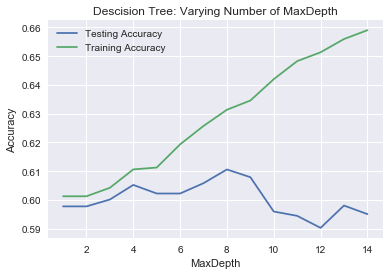

In [13]:
# Setup arrays to store train and test accuracies
tree_maxdepth = np.arange(1, 15)
train_accuracy = np.empty(len(tree_maxdepth))
test_accuracy = np.empty(len(tree_maxdepth))

# Loop over different values of k
for i, k in enumerate(tree_maxdepth):
    # Setup a k-NN Classifier with k neighbors: knn
    dtree = DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    dtree.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dtree.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dtree.score(X_test, y_test)

# Generate plot
plt.title('Descision Tree: Varying Number of MaxDepth')
plt.plot(tree_maxdepth, test_accuracy, label = 'Testing Accuracy')
plt.plot(tree_maxdepth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.show()

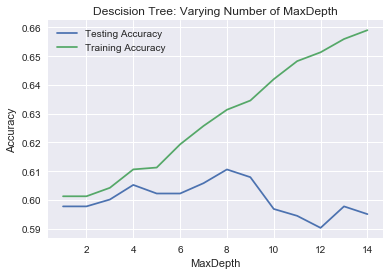

In [23]:
alpha_space = np.arange(1, 15)
ridge_scores = []
ridge_scores_std = []

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Setup a k-NN Classifier with k neighbors: knn
    dtree = DecisionTreeClassifier(max_depth=alpha)

    # Fit the classifier to the training data
    dtree.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    ridge_scores.append(dtree.score(X_train, y_train))
    

    #Compute accuracy on the testing set
    ridge_scores_std.append(dtree.score(X_test, y_test))
    

plt.title('Descision Tree: Varying Number of MaxDepth')
plt.plot(tree_maxdepth, ridge_scores_std, label = 'Testing Accuracy')
plt.plot(tree_maxdepth, ridge_scores, label = 'Training Accuracy')
plt.legend()
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.show()    
    

   
    
   

model becomes more specific to trainng data after 8 , it tries to fit to training but since the values are different 
so it is overfitting 

at 1 , its an underfit case since 

In [9]:
x = (bankcampaigns['age'] - np.mean(bankcampaigns['age']))/np.std(bankcampaigns['age'])
print(np.mean(x))
print(np.std(x))

7.019907759269815e-16
1.0000000000000053


60% training
20% validation
20% test

#try boosting model like adaboost , random forest

#better performance then descisio tree as it does not have overfitting problem

#use KNN - non-parametric - just measuring the distance between neighbouring samples

# naive-bayes 

#benefits and disadvantages of each model

